In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/gender_submission.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


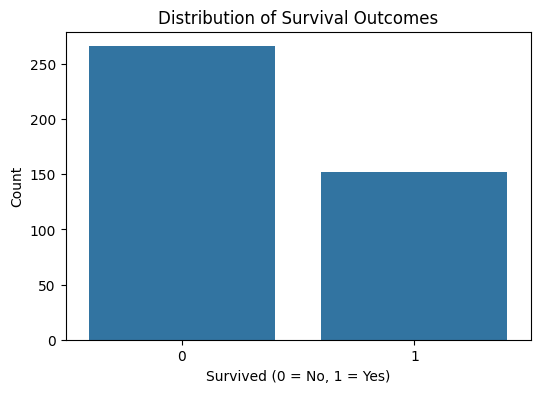

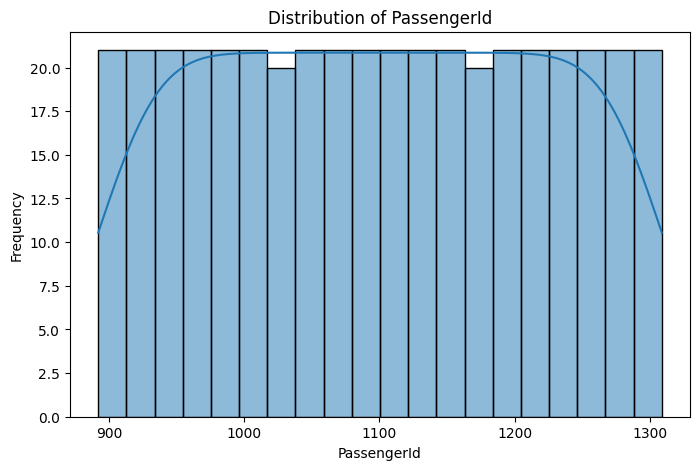


Correlation Matrix:
             PassengerId  Survived
PassengerId     1.000000 -0.023245
Survived       -0.023245  1.000000


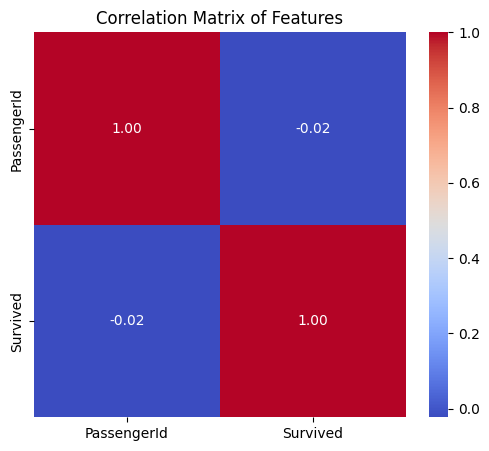

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a count plot for the 'Survived' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival Outcomes')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Generate a histogram for the 'PassengerId' column
plt.figure(figsize=(8, 5))
sns.histplot(df['PassengerId'], bins=20, kde=True)
plt.title('Distribution of PassengerId')
plt.xlabel('PassengerId')
plt.ylabel('Frequency')
plt.show()

# 3. Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Define independent variable X (PassengerId) and dependent variable y (Survived)
X = df['PassengerId'].values.reshape(-1, 1)
y = df['Survived']

# 2. Instantiate PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2)

# 3. Transform X to create polynomial features
X_poly = poly_features.fit_transform(X)

# 4. Instantiate and fit a LinearRegression model to the transformed data
model = LinearRegression()
model.fit(X_poly, y)

print("Polynomial Regression Model Fitted Successfully.")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Polynomial Regression Model Fitted Successfully.
Coefficients: [ 0.00000000e+00 -2.77099361e-03  1.21686720e-06]
Intercept: 1.9216487645327356


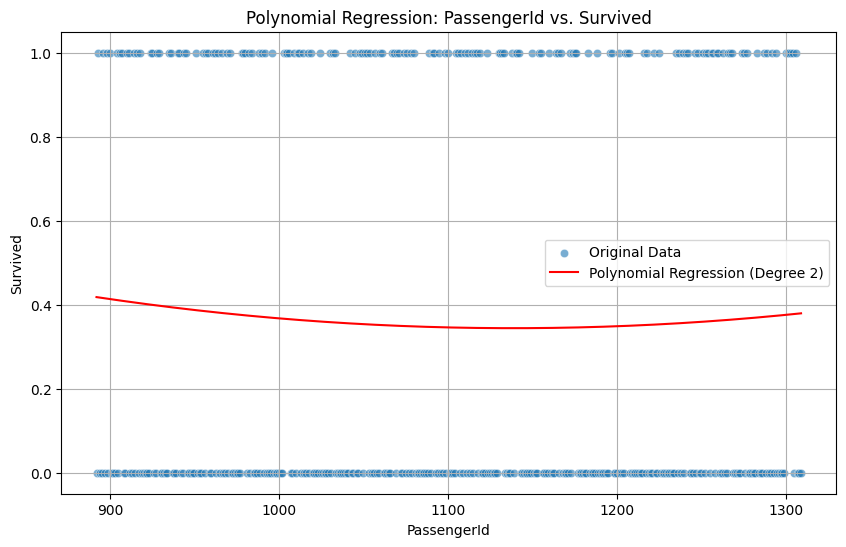

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sort the independent variable X for a smooth curve plot
X_sorted = np.sort(X.flatten()).reshape(-1, 1)
X_poly_sorted = poly_features.transform(X_sorted)

# 2. Predict the y values using the fitted model
y_pred_poly = model.predict(X_poly_sorted)

# 3. Create the scatter plot of original data and overlay the polynomial regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Original Data', alpha=0.6)
plt.plot(X_sorted, y_pred_poly, color='red', label=f'Polynomial Regression (Degree {poly_features.degree})')
plt.title('Polynomial Regression: PassengerId vs. Survived')
plt.xlabel('PassengerId')
plt.ylabel('Survived')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Define independent variable X (PassengerId) and dependent variable y (Survived)
X = df['PassengerId'].values.reshape(-1, 1)
y = df['Survived']

# 2. Instantiate a LogisticRegression model
model_logistic = LogisticRegression()

# 3. Fit the logistic regression model to X and y
model_logistic.fit(X, y)

print("Logistic Regression Model Fitted Successfully.")
print(f"Coefficients: {model_logistic.coef_}")
print(f"Intercept: {model_logistic.intercept_}")

Logistic Regression Model Fitted Successfully.
Coefficients: [[-0.00040061]]
Intercept: [-0.11906763]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a range of PassengerId values for plotting the curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 2. Predict the probabilities using the fitted model
y_pred_proba = model_logistic.predict_proba(X_range)[:, 1]

# 3. Create the scatter plot of original data and overlay the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Original Data (0=No, 1=Yes)', alpha=0.6, s=50, hue=y, palette='viridis')
plt.plot(X_range, y_pred_proba, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression: PassengerId vs. Probability of Survival')
plt.xlabel('PassengerId')
plt.ylabel('Probability of Survival')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The previous code failed because `sns.scatterplot` received multiple values for the `label` argument when `hue` was also used. I need to remove the explicit `label` argument from `sns.scatterplot` when `hue` is provided, as `seaborn` automatically handles the legend for hue categories.



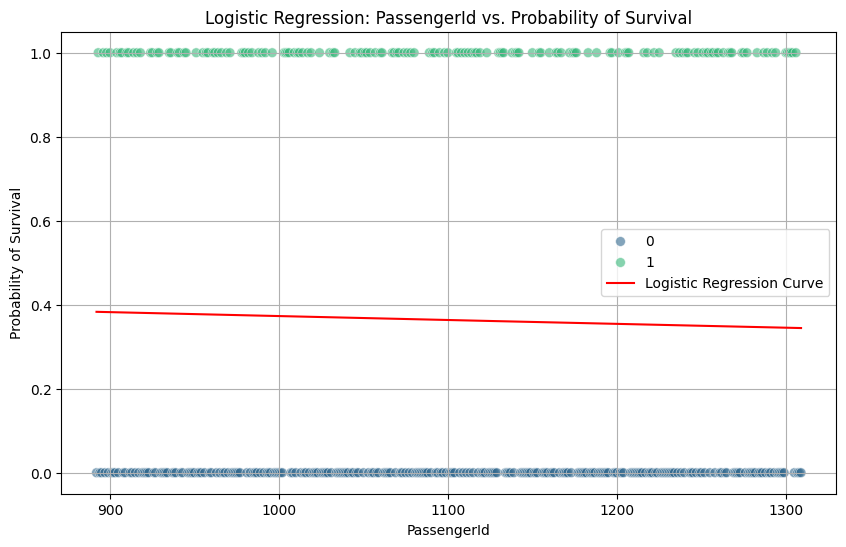

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a range of PassengerId values for plotting the curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 2. Predict the probabilities using the fitted model
y_pred_proba = model_logistic.predict_proba(X_range)[:, 1]

# 3. Create the scatter plot of original data and overlay the logistic regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, alpha=0.6, s=50, hue=y, palette='viridis')
plt.plot(X_range, y_pred_proba, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression: PassengerId vs. Probability of Survival')
plt.xlabel('PassengerId')
plt.ylabel('Probability of Survival')
plt.legend()
plt.grid(True)
plt.show()